In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.1MB/s]


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 400),
            nn.ReLU(),
            nn.Linear(400, latent_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


In [ ]:
model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss(reduction='sum')


In [ ]:
losses = []

for epoch in range(20):
    total_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, 784).to(device)
        optimizer.zero_grad()

        recon = model(x)
        loss = criterion(recon, x)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader.dataset)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 282.2594
Epoch 2, Loss: 263.1791
Epoch 3, Loss: 259.8368
Epoch 4, Loss: 258.1530
Epoch 5, Loss: 257.1374
Epoch 6, Loss: 256.3462
Epoch 7, Loss: 255.7041
Epoch 8, Loss: 255.2057
Epoch 9, Loss: 254.8202
Epoch 10, Loss: 254.3988
Epoch 11, Loss: 254.0554
Epoch 12, Loss: 253.8414
Epoch 13, Loss: 253.5520
Epoch 14, Loss: 253.2265
Epoch 15, Loss: 252.9672
Epoch 16, Loss: 252.8756
Epoch 17, Loss: 252.6026
Epoch 18, Loss: 252.4264
Epoch 19, Loss: 252.2544
Epoch 20, Loss: 252.0107


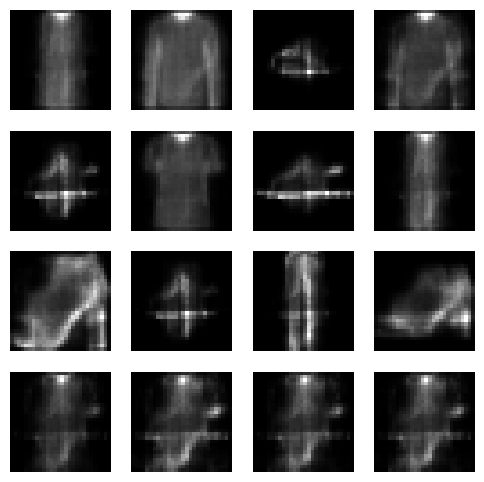

In [ ]:
latent_dim = 2   # ADD THIS

with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    samples = model.decoder(z).cpu()

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples[i].view(28,28), cmap='gray')
    plt.axis('off')
plt.show()
